In [8]:

class decisionTree(object):
    
    def __init__(self):
        pass 
    def calShannonEnt(self,dataSet):
        from math import log 
        labelCount = len(dataSet) #得到数据集总量
        labelDict = {} #创建标签字典
        #得到各标签的数量
        for feature_var in dataSet:
            label = feature_var[-1]
            if label not in labelDict.keys():
                labelDict[label]=1
            else:
                labelDict[label] += 1
        #计算香农熵
        shannonEnt = 0.0
        #对每一个标签的香农熵进行求和
        print('$',end='')
        for key in labelDict:
            prob = float(labelDict[key]) / labelCount
            shannonEnt -= prob * log(prob,2)
            print('-\\frac{%d}{%d} \log_2(\\frac{%d}{%d})'%(labelDict[key],labelCount,labelDict[key],labelCount),end='')
        print('=%.4f$'%(shannonEnt))
        return shannonEnt
    
    def splitDataSet(self,dataSet,feature_index,feature_value):
        newDataSet = []
        for feature in dataSet:
            if(feature[feature_index] == feature_value):#如果此特征的值符合要求 将该列（特征数据）去掉 后的特征放入newdataset
                #去掉该特征所在列
                tmpFeature = feature[:feature_index]
                tmpFeature.extend(feature[feature_index+1:])
                #新的特征加入newdataset
                newDataSet.append(tmpFeature)
        return newDataSet
    
    
    def chooseBestFeatureToSplit(self,dataSet,feature_name):
        #获取特征数量 = 列数-标签(1)
        numFeature = len(dataSet[0])-1
        #计算节点总体的香农熵 Entropy(D)
        baseEnt = self.calShannonEnt(dataSet)
        print('节点总体的香农熵 Entropy(D)',baseEnt)
        #假定最优信息增益与所对应特征的下标
        bestInfoGain = 0
        bestFeature = -1
        #遍历各个特征计算信息熵
        for feature_index in range(numFeature):
            print('特征:',feature_name[feature_index])
            #得到该特征下的value的取值有几种情况
            feature_value_list = [feature[feature_index] for feature in dataSet]
            #去除重复
            valueKinds = set(feature_value_list)
            #子节点信息熵
            childEntSum = 0
            #子节点数量 = 特征取值种类
            print('计算子节点信息熵:$Entropy(x)= -\sum_{i \in class}p(i|x)log_2p(i|x)$')
            tmp_str=''
            for value in valueKinds:
                #划分数据集
                subDataSet = self.splitDataSet(dataSet,feature_index,value)
                #归一化信息熵 的前缀  =  符合条件的数据 / 总共数据
                prob = len(subDataSet)/len(feature_value_list)
                #累加各子节点的归一化信息熵
                print('Entropy(%s)'%(value) , end='')
                tmp =self.calShannonEnt(subDataSet)
                tmp_str+='-\\frac{%d}{%d}Entropy(%s)'%(len(subDataSet),len(feature_value_list),value)
                childEntSum += prob*tmp
            
            #计算节点的信息增益
            infoGain = baseEnt - childEntSum
            print('节点【%s】的信息增益:'%(feature_name[feature_index]))
            gongshi_str='Gain(S,A=%s) = Entropy(S) - \sum_{v \in values(A)} \\frac{|S_v|}{|S|}Entropy(S_v)\\\='%(feature_name[feature_index])
            print('$'+gongshi_str+'%.3f'%(baseEnt)+tmp_str+'=%.3f'%(infoGain)+'$')
            if(infoGain>=bestInfoGain):
                bestInfoGain = infoGain
                bestFeature = feature_index
        print("-----------------------\n信息熵益最大的特征是:",feature_name[bestFeature],'\n')
        return bestFeature

    def majorityCnt(self,classList): 
        import operator  
        classCount={}  
        for vote in classList:  
            if vote not in classCount.keys(): classCount[vote] = 0  
            classCount[vote] += 1  
        sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True) 
        print('叶子节点类别为:',sortedClassCount[0][0] )
        return sortedClassCount[0][0]  
    
    def createTree(self,dataSet,feature_name):
        #获得数据集中的类别
        classList = [feature[-1] for feature in dataSet]
        #类别完全相同->停止划分
        if classList.count(classList[0])==len(classList):
            print('叶子节点类别为:',classList[0])
            return classList[0]
        #遍历完所有特征->返回出现次数最多的类别
        if len(dataSet[0])==1:
            return majorityCnt(classList)
        #可递归情况
        #选择特征进行数据集划分
        bestFeature_index= self.chooseBestFeatureToSplit(dataSet,feature_name)
        bestFeature_name=feature_name[bestFeature_index]
        #生成节点（用字典的形式）
        myTree = {bestFeature_name:{}}
        #删除此特征
        #del(feature_name[bestFeature_index]) #这样写函数会改变原来的featue_name外部也改变
        subFeatureName=feature_name[0:bestFeature_index]
        subFeatureName.extend(feature_name[bestFeature_index+1:])
        #该特征对应的所有可能值
        featvalues = [feature[bestFeature_index] for feature in dataSet]
        uniqueValues = set(featvalues)
        #以该特征不同的取值作为子节点进行递归
        for value in uniqueValues:
            #访问字典元素 再以特征取值 生成键值对 形成递归
            print(bestFeature_name+'的特征属性分支:',value)
            myTree[bestFeature_name][value] = self.createTree(self.splitDataSet(dataSet,bestFeature_index,value),subFeatureName)
        print( bestFeature_name,'的所有分支递归结束')
        return myTree

    def classify(self,inputTree , feature_name , testdata):
        #特征节点 字典第一个关键字
        first_feature_name =list(inputTree.keys())[0]
        #子树
        chlidTree = inputTree[first_feature_name]
        #特征的索引
        feature_index = feature_name.index(first_feature_name)
        #遍历所有特征值
        for feature_value in chlidTree.keys():
            # test数据里面的此特征值与对应的相同
            if testdata[feature_index] == feature_value:
                #如果该特征的取值有子树 即还有分类 即递归调用
                if(type(chlidTree[feature_value]).__name__=='dict'):
                    classLabel = self.classify(chlidTree[feature_value],feature_name,testdata)
                else: #树叶节点 最终类别
                    classLabel = chlidTree[feature_value]
                return classLabel
        
    def train(self,trainData,feature_name):
        self.Tree = self.createTree(trainData,feature_name)
        self.feature_name = feature_name
    
    def predict(self,testData):
        pre=[]
        for testObj in testData:
            preLabel = self.classify(self.Tree,self.feature_name,testObj)
            pre.append(preLabel)
        return pre
    

In [9]:
import pandas as pd
import numpy as np 

In [10]:
data = pd.read_csv('西瓜的数据集.csv')
features_list  = np.array(data.columns)
features_name = features_list[0:6].tolist()
features_name

['生存能力', '攻击伤害', '技能效果', '上手难度']

In [11]:
data = np.array(data).tolist()

[['高', '低', '低', '低', '坦克'],
 ['低', '低', '较高', '低', '法师'],
 ['较低', '较低', '较低', '较低', '战士'],
 ['较低', '低', '较低', '较低', '法师'],
 ['低', '低', '较高', '低', '法师'],
 ['低', '低', '高', '较低', '法师'],
 ['低', '较高', '较低', '较低', '射手'],
 ['低', '高', '低', '低', '射手'],
 ['较高', '低', '低', '低', '辅助'],
 ['较高', '低', '较低', '低', '辅助'],
 ['较低', '低', '高', '低', '法师'],
 ['低', '高', '低', '较低', '刺客'],
 ['较高', '较低', '较高', '低', '战士'],
 ['低', '低', '较低', '较低', '辅助'],
 ['较低', '低', '低', '低', '法师'],
 ['较高', '低', '低', '低', '坦克'],
 ['较低', '较低', '较高', '较低', '法师'],
 ['较低', '较低', '低', '低', '战士'],
 ['低', '低', '高', '较高', '法师'],
 ['较高', '低', '较低', '低', '坦克'],
 ['低', '低', '较高', '低', '法师'],
 ['较低', '较低', '较低', '低', '战士'],
 ['较低', '较低', '低', '低', '战士'],
 ['较低', '较高', '低', '较低', '战士'],
 ['低', '较高', '较低', '高', '刺客'],
 ['低', '较低', '较低', '较低', '射手'],
 ['低', '高', '低', '低', '射手'],
 ['较高', '较低', '低', '较低', '战士'],
 ['高', '低', '较低', '低', '坦克'],
 ['低', '低', '高', '较低', '法师'],
 ['较低', '较低', '低', '低', '战士'],
 ['较低', '较低', '较低', '较高', '战士'],
 ['低', '低', '

In [12]:
mytree = decisionTree()
mytree.train(data,features_name)

$-\frac{9}{109} \log_2(\frac{9}{109})-\frac{27}{109} \log_2(\frac{27}{109})-\frac{28}{109} \log_2(\frac{28}{109})-\frac{14}{109} \log_2(\frac{14}{109})-\frac{16}{109} \log_2(\frac{16}{109})-\frac{15}{109} \log_2(\frac{15}{109})=2.4799$
节点总体的香农熵 Entropy(D) 2.4798948455848016
特征: 生存能力
计算子节点信息熵:$Entropy(x)= -\sum_{i \in class}p(i|x)log_2p(i|x)$
Entropy(低)$-\frac{21}{50} \log_2(\frac{21}{50})-\frac{14}{50} \log_2(\frac{14}{50})-\frac{12}{50} \log_2(\frac{12}{50})-\frac{2}{50} \log_2(\frac{2}{50})-\frac{1}{50} \log_2(\frac{1}{50})=1.8326$
Entropy(较高)$-\frac{6}{22} \log_2(\frac{6}{22})-\frac{10}{22} \log_2(\frac{10}{22})-\frac{5}{22} \log_2(\frac{5}{22})-\frac{1}{22} \log_2(\frac{1}{22})=1.7168$
Entropy(高)$-\frac{4}{6} \log_2(\frac{4}{6})-\frac{2}{6} \log_2(\frac{2}{6})=0.9183$
Entropy(较低)$-\frac{17}{31} \log_2(\frac{17}{31})-\frac{5}{31} \log_2(\frac{5}{31})-\frac{3}{31} \log_2(\frac{3}{31})-\frac{6}{31} \log_2(\frac{6}{31})=1.6845$
节点【生存能力】的信息增益:
$Gain(S,A=生存能力) = Entropy(S) - \sum_{v \in 

NameError: name 'majorityCnt' is not defined

In [6]:
print(mytree.Tree)

{'纹理': {'稍糊': {'触感': {'软粘': '是', '硬滑': '否'}}, '清晰': {'触感': {'软粘': {'脐部': {'稍凹': {'色泽': {'青绿': '是', '乌黑': '否'}}, '平坦': '否'}}, '硬滑': '是'}}, '模糊': '否'}}


In [178]:
val_dataset  = pd.read_csv('西瓜的验证集.csv')
label = np.array(val_dataset['好瓜']).tolist()
val_data = np.array(val_dataset)[:,0:6].tolist()
val_data

[['青绿', '蜷缩', '浊响', '清晰', '稍凹', '软粘'],
 ['浅白', '蜷缩', '沉闷', '稍糊', '平坦', '硬滑'],
 ['浅白', '硬挺', '沉闷', '模糊', '凹陷', '软粘'],
 ['乌黑', '蜷缩', '浊响', '清晰', '稍凹', '硬滑'],
 ['浅白', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑'],
 ['青绿', '蜷缩', '浊响', '模糊', '平坦', '硬滑'],
 ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑'],
 ['青绿', '硬挺', '浊响', '稍糊', '凹陷', '硬滑'],
 ['青绿', '稍蜷', '浊响', '稍糊', '稍凹', '硬滑']]

In [70]:
mytree.predict(val_data)

['是', '否', '否', '是', '否', '否', '是', '否', '否']

In [71]:
label

['是', '否', '否', '是', '否', '否', '是', '否', '否']

In [100]:
tree = mytree.Tree

In [101]:
tree 

{'纹理': {'清晰': {'触感': {'软粘': {'脐部': {'稍凹': {'色泽': {'乌黑': '否', '青绿': '是'}},
      '平坦': '否'}},
    '硬滑': '是'}},
  '模糊': '否',
  '稍糊': {'触感': {'软粘': '是', '硬滑': '否'}}}}

dict_keys(['稍凹', '平坦'])

In [203]:
# -*- coding: utf-8 -*-
"""
@author: 蔚蓝的天空Tom
Aim:得到决策树的字典后，需要使用python来绘制对应的决策树figure
输入决策树的字典，样例如下所示：
dtree = {'house?': {'hourse_no': {'working?': {'work_no': 'refuse', 'work_yes': 'agree'}}, 'hourse_yes': 'agree'}}
"""
 
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties # 步骤一
# ...
font1 = FontProperties(fname="/System/Library/Fonts/PingFang.ttc", size=15)

font2 = FontProperties(fname="/System/Library/Fonts/PingFang.ttc", size=10)
# import importlib
# import sys 
# importlib.reload(sys)
 
#定义判断结点形状,其中boxstyle表示文本框类型,fc指的是注释框颜色的深度
decisionNode = dict(boxstyle="round4", color='r', fc='0.9')
#定义叶结点形状
leafNode = dict(boxstyle="circle", color='m')
#定义父节点指向子节点或叶子的箭头形状
arrow_args = dict(arrowstyle="<-", color='g')
 
def plot_node(node_txt, center_point, parent_point, node_style):
    '''
    绘制父子节点，节点间的箭头，并填充箭头中间上的文本
    :param node_txt:文本内容
    :param center_point:文本中心点
    :param parent_point:指向文本中心的点
    '''
    createPlot.ax1.annotate(node_txt, 
                            xy=parent_point,
                            xycoords='axes fraction',
                            xytext=center_point,
                            textcoords='axes fraction',
                            va="center",
                            ha="center",
                            bbox=node_style,
                            arrowprops=arrow_args,
                            FontProperties=font1)
 
def get_leafs_num(tree_dict):
    '''
    获取叶节点的个数
    :param tree_dict:树的数据字典
    :return tree_dict的叶节点总个数
    '''
    #tree_dict的叶节点总数
    leafs_num = 0
    
    #字典的第一个键，也就是树的第一个节点
    root = list(tree_dict.keys())[0]
    #这个键所对应的值，即该节点的所有子树。
    child_tree_dict =tree_dict[root]
    for key in child_tree_dict.keys():
        #检测子树是否字典型
        if type(child_tree_dict[key]).__name__=='dict':
            #子树是字典型，则当前树的叶节点数加上此子树的叶节点数
            leafs_num += get_leafs_num(child_tree_dict[key])
        else:
            #子树不是字典型，则当前树的叶节点数加1
            leafs_num += 1
 
    #返回tree_dict的叶节点总数
    return leafs_num
 
def get_tree_max_depth(tree_dict):
    '''
    求树的最深层数
    :param tree_dict:树的字典存储
    :return tree_dict的最深层数
    '''
    #tree_dict的最深层数
    max_depth = 0
    
    #树的根节点
    root = list(tree_dict.keys())[0]
    #当前树的所有子树的字典
    child_tree_dict = tree_dict[root]
    
    for key in child_tree_dict.keys():
        #树的当前分支的层数
        this_path_depth = 0
        #检测子树是否字典型
        if type(child_tree_dict[key]).__name__ == 'dict':
            #如果子树是字典型，则当前分支的层数需要加上子树的最深层数
            this_path_depth = 1 + get_tree_max_depth(child_tree_dict[key])
        else:
            #如果子树不是字典型，则是叶节点，则当前分支的层数为1
            this_path_depth = 1
        if this_path_depth > max_depth:
            max_depth = this_path_depth
    
    #返回tree_dict的最深层数
    return max_depth
 
def plot_mid_text(center_point, parent_point, txt_str):
    '''
    计算父节点和子节点的中间位置，并在父子节点间填充文本信息
    :param center_point:文本中心点
    :param parent_point:指向文本中心点的点
    '''
    
    x_mid = (parent_point[0] - center_point[0])/2.0 + center_point[0]
    y_mid = (parent_point[1] - center_point[1])/2.0 + center_point[1]
    createPlot.ax1.text(x_mid, y_mid, txt_str,FontProperties=font2)
    return
 
def plotTree(tree_dict, parent_point, node_txt):
    '''
    绘制树
    :param tree_dict:树
    :param parent_point:父节点位置
    :param node_txt:节点内容
    '''
    
    leafs_num = get_leafs_num(tree_dict)
    root = list(tree_dict.keys())[0]
    #plotTree.totalW表示树的深度
    center_point = (plotTree.xOff+(1.0+float(leafs_num))/2.0/plotTree.totalW,plotTree.yOff)
    #填充node_txt内容
    plot_mid_text(center_point, parent_point, node_txt)
    #绘制箭头上的内容
    plot_node(root, center_point, parent_point, decisionNode)
    #子树
    child_tree_dict = tree_dict[root]
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD
    #因从上往下画，所以需要依次递减y的坐标值，plotTree.totalD表示存储树的深度
    for key in child_tree_dict.keys():
        if type(child_tree_dict[key]).__name__ == 'dict':
            plotTree(child_tree_dict[key],center_point,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW
            plot_node(child_tree_dict[key],(plotTree.xOff,plotTree.yOff),center_point,leafNode)
            plot_mid_text((plotTree.xOff,plotTree.yOff),center_point,str(key))
    #h绘制完所有子节点后，增加全局变量Y的偏移
    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD
 
    return
 
def createPlot(tree_dict):
    '''
    绘制决策树图形
    :param tree_dict
    :return 无
    '''
    #设置绘图区域的背景色
    fig=plt.figure(1,facecolor='white')
    #清空绘图区域
    fig.clf()
    #定义横纵坐标轴,注意不要设置xticks和yticks的值!!!
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1=plt.subplot(111, frameon=False, **axprops)
    #由全局变量createPlot.ax1定义一个绘图区，111表示一行一列的第一个，frameon表示边框,**axprops不显示刻度
    plotTree.totalW=float(get_leafs_num(tree_dict))
    plotTree.totalD=float(get_tree_max_depth(tree_dict))
    plotTree.xOff=-0.5/plotTree.totalW;
    plotTree.yOff=1.0;
    plotTree(tree_dict, (0.5,1.0), '')
    plt.show()
    





<ipython-input-203-605378032af9>:109: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  createPlot.ax1.text(x_mid, y_mid, txt_str,FontProperties=font2)
<ipython-input-203-605378032af9>:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  createPlot.ax1.annotate(node_txt,


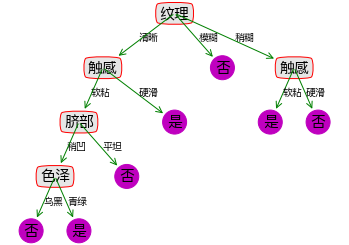

In [204]:
createPlot(tree)

'/Users/larry/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [197]:
def getNumLeafs(myTree):
# 函数说明:获取决策树叶子结点的数目
# Parameters:
# myTree - 决策树
# Returns:
# numLeafs - 决策树的叶子结点的数目
    numLeafs = 0												#初始化叶子
    firstStr = next(iter(myTree))								#python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]								#获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':				#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs


def getTreeDepth(myTree):
# 函数说明:获取决策树的层数
# Parameters:
# 	myTree - 决策树
# Returns:
# 	maxDepth - 决策树的层数
    maxDepth = 0												#初始化决策树深度
    firstStr = next(iter(myTree))								#python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]								#获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':				#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth			#更新层数
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
# 函数说明:绘制结点
# Parameters:
# 	nodeTxt - 结点名
# 	centerPt - 文本位置
# 	parentPt - 标注的箭头位置
# 	nodeType - 结点格式
# Returns:
# 	无
	arrow_args = dict(arrowstyle="<-")											#定义箭头格式
	font = FontProperties(fname="/System/Library/Fonts/PingFang.ttc", size=14)		#设置中文字体
	createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',	#绘制结点
		xytext=centerPt, textcoords='axes fraction',
		va="center", ha="center", bbox=nodeType, arrowprops=arrow_args, FontProperties=font)

def plotMidText(cntrPt, parentPt, txtString):
# 函数说明:标注有向边属性值
# Parameters:
# 	cntrPt、parentPt - 用于计算标注位置
# 	txtString - 标注的内容
# Returns:
# 	无
	xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]											#计算标注位置
	yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
	createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30,FontProperties=font)


def plotTree(myTree, parentPt, nodeTxt):
# 函数说明:绘制决策树
# Parameters:
# 	myTree - 决策树(字典)
# 	parentPt - 标注的内容
# 	nodeTxt - 结点名
# Returns:
# 	无
	decisionNode = dict(boxstyle="sawtooth", fc="0.8")										#设置结点格式
	leafNode = dict(boxstyle="round4", fc="0.8")											#设置叶结点格式
	numLeafs = getNumLeafs(myTree)  														#获取决策树叶结点数目，决定了树的宽度
	depth = getTreeDepth(myTree)															#获取决策树层数
	firstStr = next(iter(myTree))															#下个字典
	cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)	#中心位置
	plotMidText(cntrPt, parentPt, nodeTxt)													#标注有向边属性值
	plotNode(firstStr, cntrPt, parentPt, decisionNode)										#绘制结点
	secondDict = myTree[firstStr]															#下一个字典，也就是继续绘制子结点
	plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD										#y偏移
	for key in secondDict.keys():
		if type(secondDict[key]).__name__=='dict':											#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
			plotTree(secondDict[key],cntrPt,str(key))        								#不是叶结点，递归调用继续绘制
		else:																				#如果是叶结点，绘制叶结点，并标注有向边属性值
			plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
			plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
			plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
	plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD


def createPlot(inTree):
# 函数说明:创建绘制面板
# Parameters:
# 	inTree - 决策树(字典)
# Returns:
# 	无
    fig = plt.figure(1, facecolor='white')													#创建fig
    fig.clf()																				#清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    							#去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))											#获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))											#获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;								#x偏移
    plotTree(inTree, (0.5,1.0), '')															#绘制决策树
    plt.show()																				#显示绘制结果

def classify(inputTree, featLabels, testVec):
# 函数说明:使用决策树分类
# Parameters:
# 	inputTree - 已经生成的决策树
# 	featLabels - 存储选择的最优特征标签
# 	testVec - 测试数据列表，顺序对应最优特征标签
# Returns:
# 	classLabel - 分类结果
	firstStr = next(iter(inputTree))														#获取决策树结点
	secondDict = inputTree[firstStr]														#下一个字典
	featIndex = featLabels.index(firstStr)
	for key in secondDict.keys():
		if testVec[featIndex] == key:
			if type(secondDict[key]).__name__ == 'dict':
				classLabel = classify(secondDict[key], featLabels, testVec)
			else: classLabel = secondDict[key]
	return classLabel

def storeTree(inputTree, filename):
# 函数说明:存储决策树
# Parameters:
# 	inputTree - 已经生成的决策树
# 	filename - 决策树的存储文件名
# Returns:
# 	无
	with open(filename, 'wb') as fw:
		pickle.dump(inputTree, fw)

def grabTree(filename):
# 函数说明:读取决策树
# Parameters:
# 	filename - 决策树的存储文件名
# Returns:
# 	pickle.load(fr) - 决策树字典
	fr = open(filename, 'rb')
	return pickle.load(fr)

<ipython-input-197-016734b77552>:57: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30,FontProperties=font)
<ipython-input-197-016734b77552>:44: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',	#绘制结点


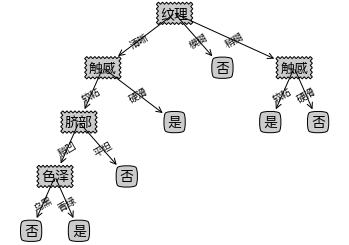

In [198]:
createPlot(tree)